In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# data obtained from https://www.kaggle.com/code/nayanack/california-house-price-prediction-using-pytorch

data=pd.read_csv('housing_data/housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Meta Data about the original data
1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

# Performing Exploratory Data Analysis on data (EDA)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
data.shape

(20640, 10)

In [5]:
data.describe().T # flips the columns and rows 

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [6]:
data.isnull().sum() # this data shows to have some null values for the total_bedrooms column

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
for i in data.columns:
    print(i, data[i].nunique())

longitude 844
latitude 862
housing_median_age 52
total_rooms 5926
total_bedrooms 1923
population 3888
households 1815
median_income 12928
median_house_value 3842
ocean_proximity 5


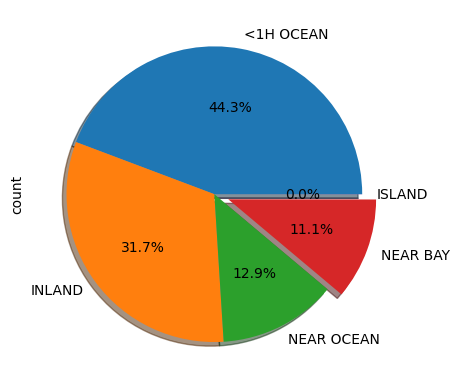

In [8]:
data.ocean_proximity.value_counts().plot(kind='pie',shadow=True,autopct='%1.1f%%',explode=(0,0,0,0.1,0))
plt.show()

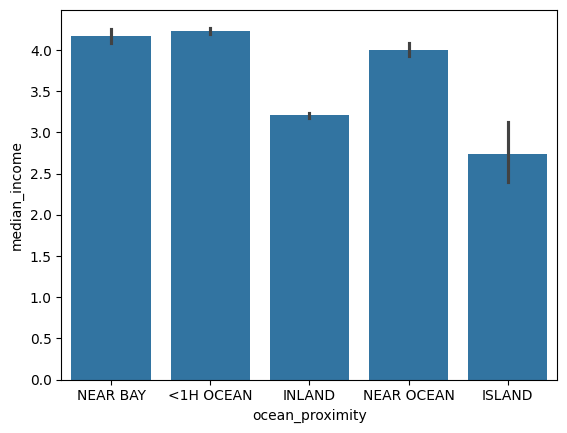

In [9]:
sns.barplot(data=data,x='ocean_proximity',y='median_income')
plt.show()

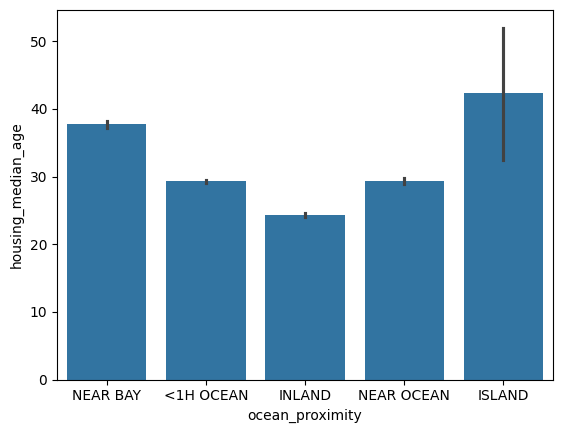

In [10]:
sns.barplot(data=data,y='housing_median_age',x='ocean_proximity')
plt.show()

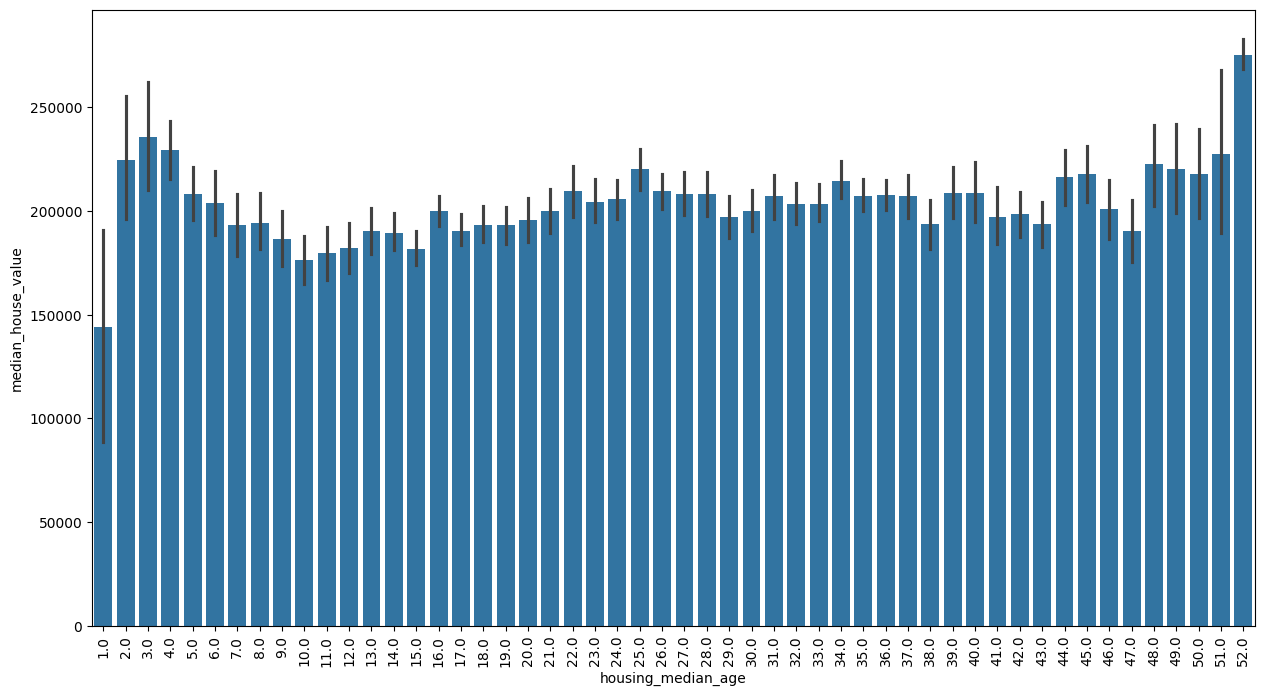

In [11]:
plt.figure(figsize=(15,8))
sns.barplot(data=data,x='housing_median_age',y='median_house_value')
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='Density'>

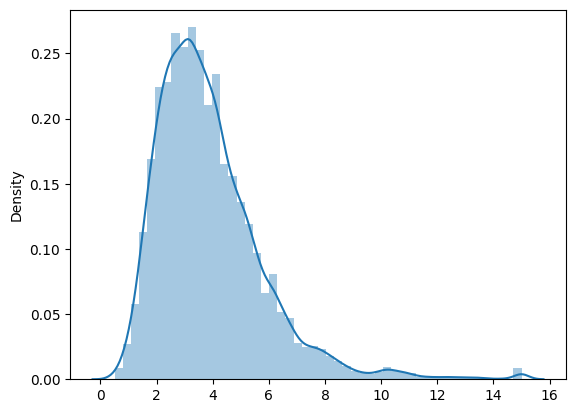

In [12]:
sns.distplot(x=data['median_income'])

## perform train/test split and determine and determine the ML model (what question you want to answer)

In [13]:
# get median income in readable format for end-user
data['median_income'] = data['median_income'] * 10000 # get it in the right decimal place
data



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,83252.0,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,83014.0,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,72574.0,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,56431.0,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,38462.0,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,15603.0,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,25568.0,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,17000.0,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,18672.0,84700.0,INLAND


In [14]:
data.dropna(inplace=True) # this will drop all the rows that have any missing null values so some data will be lost
data.isnull().sum()



longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [15]:
# need to convert near ocean column into numerical for analysis
df_dummies = pd.get_dummies(data['ocean_proximity'])
df_dummies



,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
20635,False,True,False,False,False
20636,False,True,False,False,False
20637,False,True,False,False,False
20638,False,True,False,False,False


In [16]:
# Ensure column names are string and replace unsupported characters
df_dummies.columns = [col.replace('[', '').replace(']', '').replace('<', '') for col in df_dummies.columns]

In [17]:
# categorical data being changed into numerical values whether true or false
data = pd.concat([data, df_dummies], axis=1)
data



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,83252.0,452600.0,NEAR BAY,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,83014.0,358500.0,NEAR BAY,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,72574.0,352100.0,NEAR BAY,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,56431.0,341300.0,NEAR BAY,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,38462.0,342200.0,NEAR BAY,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,15603.0,78100.0,INLAND,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,25568.0,77100.0,INLAND,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,17000.0,92300.0,INLAND,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,18672.0,84700.0,INLAND,False,True,False,False,False


In [18]:
data.drop(['ocean_proximity'], axis=1, inplace=True)
data



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,83252.0,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,83014.0,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,72574.0,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,56431.0,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,38462.0,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,15603.0,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,25568.0,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,17000.0,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,18672.0,84700.0,False,True,False,False,False


In [19]:
data.corr()



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.003777,0.026477,-0.007603,-0.023647,-0.008674
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,0.073450,-0.019602,-0.010451,-0.061480,-0.023498
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,0.041883,-0.038265,-0.009119,-0.011280,0.002106
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.257614,-0.484787,0.023525,0.160526,0.140378
1H OCEAN,0.320831,-0.446928,0.045553,-0.003777,0.018314,0.073450,0.041883,0.168715,0.257614,1.000000,-0.607778,-0.013928,-0.314721,-0.342018


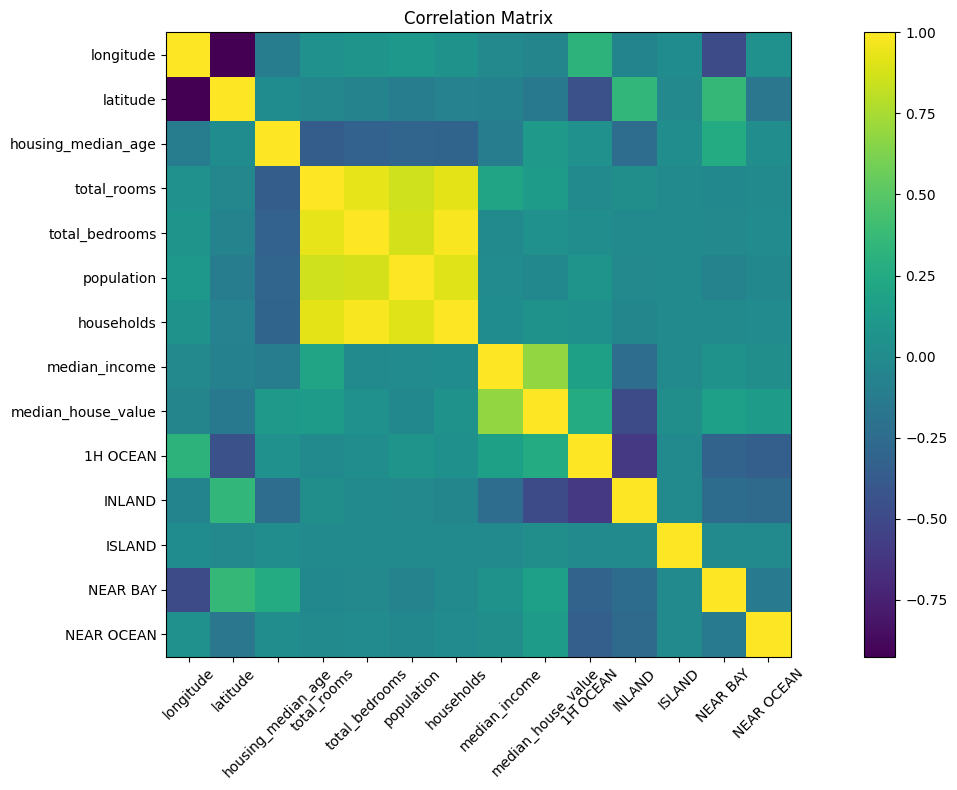

In [20]:
# Compute correlation matrix
correlation_matrix = data.corr()

# Plot correlation matrix
plt.figure(figsize=(15,8))
plt.imshow(correlation_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.tight_layout()
plt.show()

## we want to undenrstand how to predict the median_house_value, so this is our target column (y)

In [21]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1) # this is the input data with the target data removed
y = data['median_house_value'] # this is output data that you want to predict

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% will be used for training and 30% of the data will be used for testing, randomized each time

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

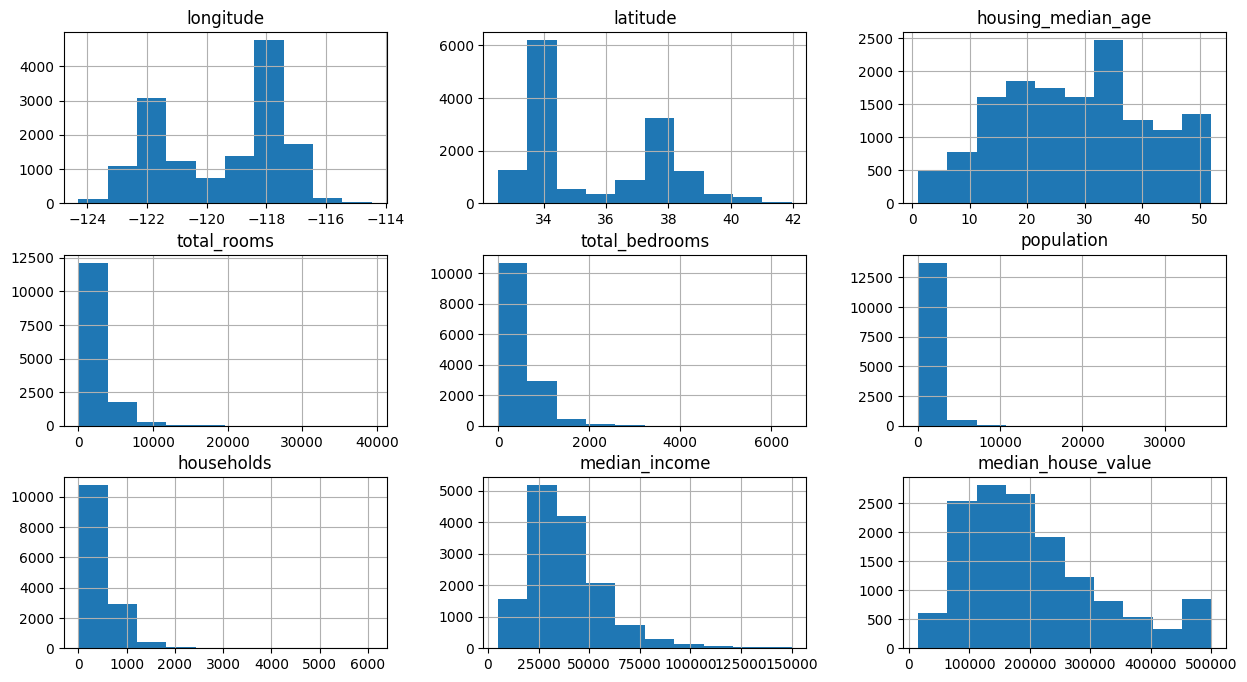

In [23]:
train_data = X_train.join(y_train)
train_data.hist(figsize=(15,8))

<Axes: >

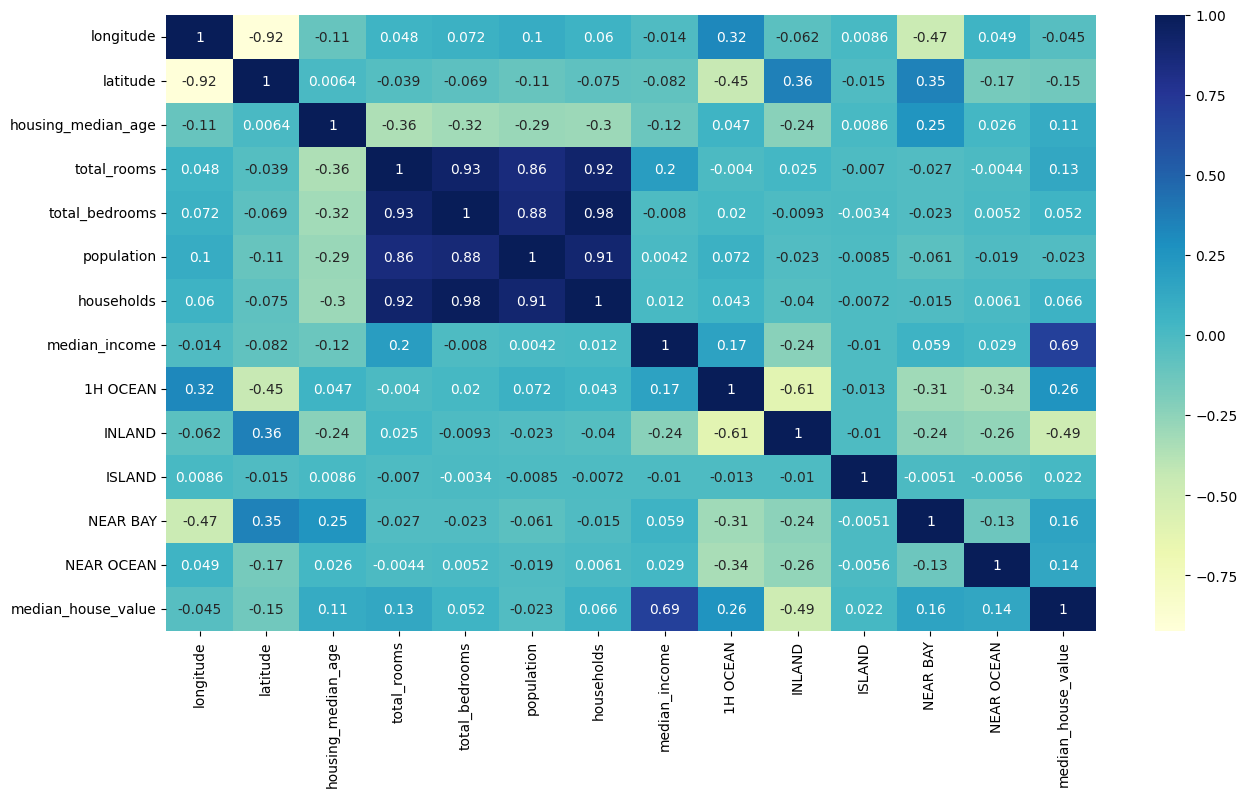

In [24]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True, cmap='YlGnBu')

In [25]:
# getting a log version of the volumns will provide more a bell curve distribution
train_data['total_rooms'] = np.log(train_data['total_rooms'] +1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] +1)
train_data['population'] = np.log(train_data['population'] +1)
train_data['households'] = np.log(train_data['households'] +1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

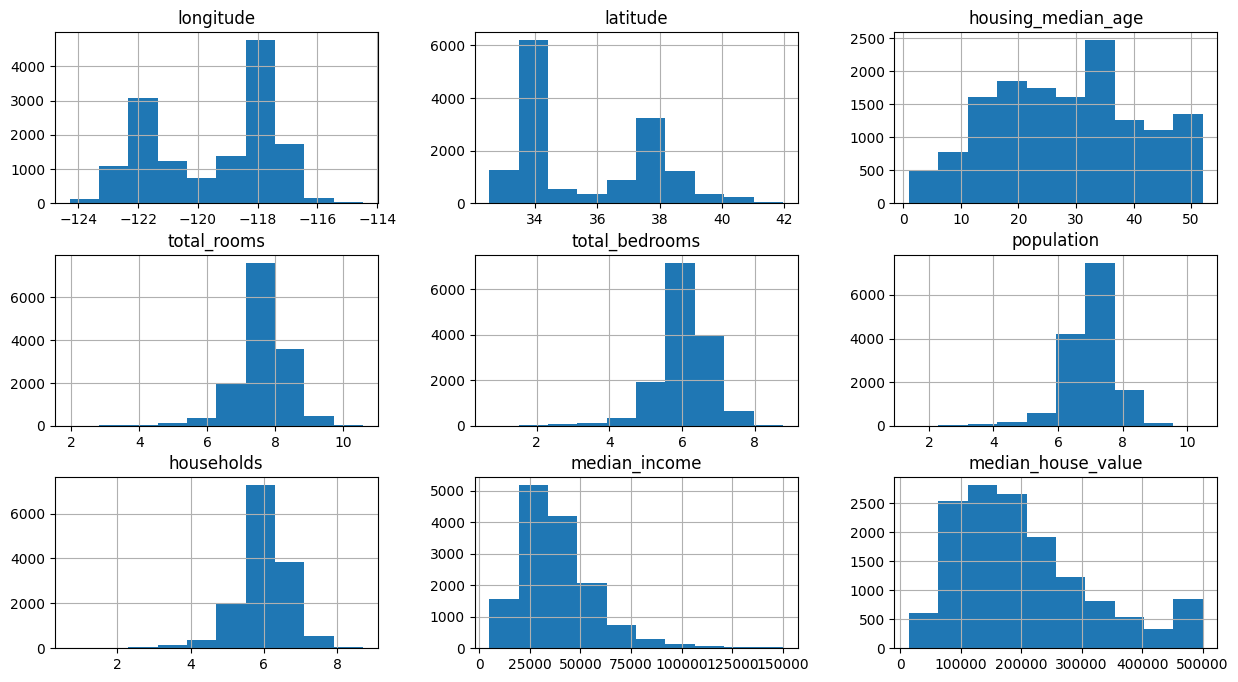

In [26]:
train_data.hist(figsize=(15,8))

<Axes: xlabel='latitude', ylabel='longitude'>

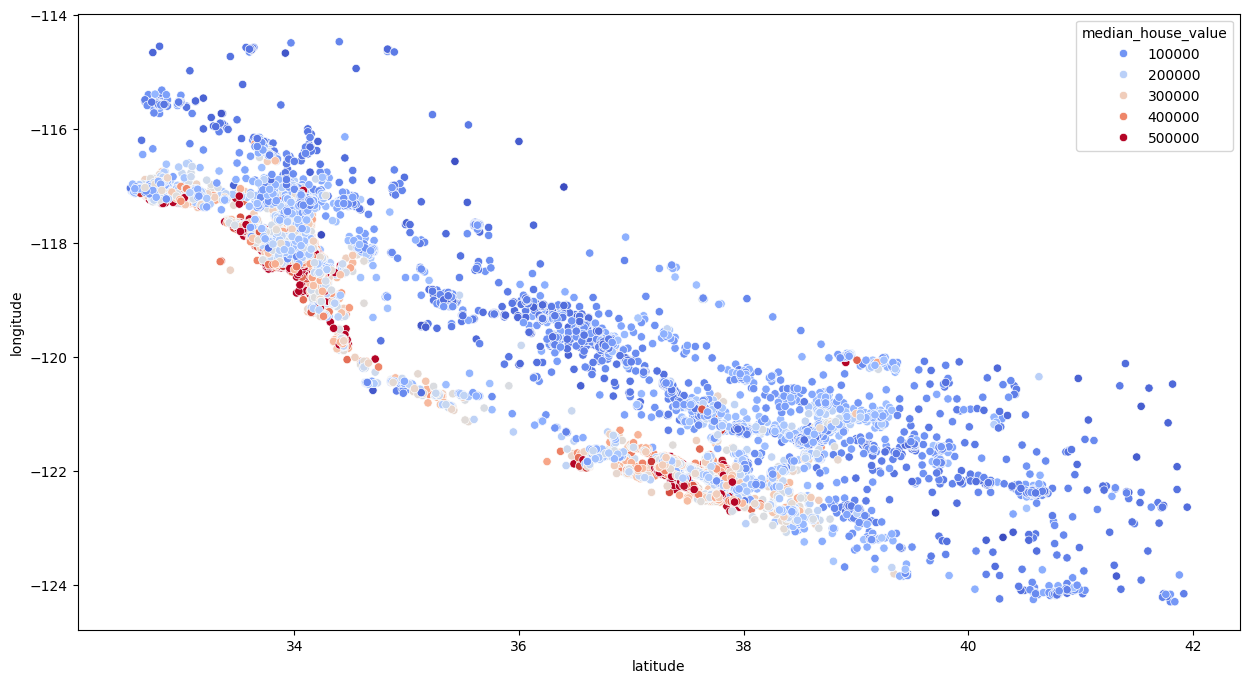

In [27]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue="median_house_value", palette="coolwarm")

In [28]:
import pandas as pd

# Ensure column names are string and replace unsupported characters
X_train.columns = [col.replace('[', '').replace(']', '').replace('<', '') for col in X_train.columns]

# Ensure column names are string and replace unsupported characters
X_test.columns = [col.replace('[', '').replace(']', '').replace('<', '') for col in X_test.columns]

# Now you can check your column names
print(X_train.columns)


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       '1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')


## FEATURE ENGINEERING
### calculating and creating additional columns from existing columns to get additional features to better predict target column values for future data

In [29]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

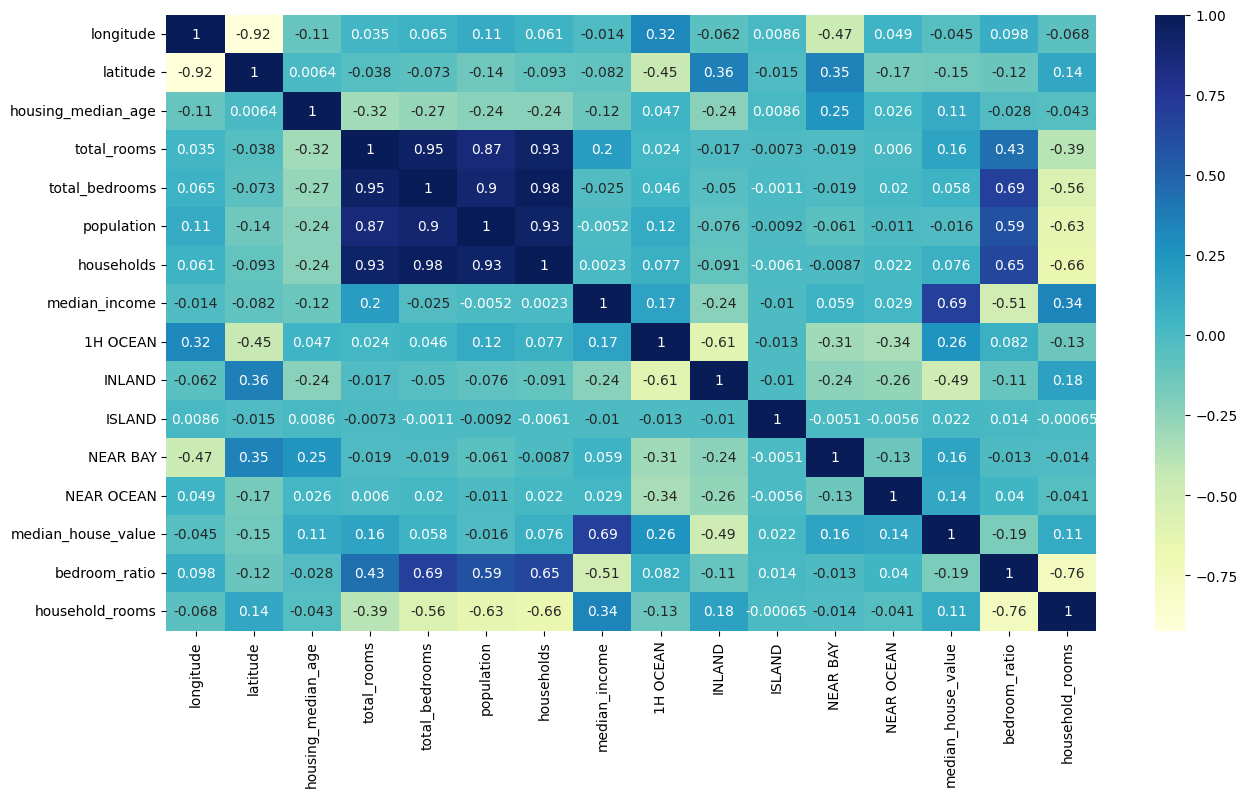

In [30]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

## Machine Learning Model #1 Linear Regression
implementation of linear regression 

In [31]:
"""
This is where we take the 70% of the total data and we train a linear regression model on all the columns aside from the target column.
If the results are accurate enough for production and monitoring, we save this model (as a pickle file etc) result and use it in prod to feed it new data. 
"""

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

X_train_s = scaler.fit_transform(X_train)

linreg = LinearRegression()

linreg.fit(X_train_s,y_train)

LinearRegression()

In [32]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] +1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] +1)
test_data['population'] = np.log(test_data['population'] +1)
test_data['households'] = np.log(test_data['households'] +1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [33]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [34]:
X_test_s = scaler.transform(X_test)

In [35]:
linreg.score(X_test_s, y_test)

0.6735888195296866

In [36]:
import pickle

# this will save as a pickle file and it will be in binary/encoded, not in human readable language
# you specify 'wb' which stands for 'write binary' and pass the model variable to it
with open('linreg_model', 'wb') as f:
    pickle.dump(linreg,f)

## MACHINE LEARNING MODEL #2 Random Forest
ensemble decision tree model random forest

In [37]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train,y_train)

RandomForestRegressor()

In [38]:
forest.score(X_test, y_test)

0.8155013616925901

In [39]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
15261,-117.26,33.02,9.0,8.440960,6.633318,7.452982,6.530878,63712.0,False,False,False,False,True,0.785849,1.292469
13421,-117.49,34.04,4.0,8.705331,7.065613,8.168486,7.002156,41775.0,False,True,False,False,False,0.811642,1.243236
12917,-121.31,38.64,19.0,8.595635,6.732211,7.564238,6.690842,46302.0,False,True,False,False,False,0.783213,1.284686
14387,-117.23,32.75,21.0,7.626083,6.411818,7.031741,6.311735,24779.0,False,False,False,False,True,0.840775,1.208239
18315,-122.12,37.44,33.0,7.997999,6.436150,7.269617,6.378426,54850.0,False,False,False,True,False,0.804720,1.253914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12348,-116.56,33.83,36.0,7.476472,5.991465,6.113682,5.579730,26083.0,False,True,False,False,False,0.801376,1.339934
11355,-117.93,33.74,15.0,7.095893,5.645447,6.519147,5.602119,39219.0,True,False,False,False,False,0.795594,1.266645
16502,-121.13,37.74,31.0,6.519147,4.976734,6.261492,5.075174,24598.0,False,True,False,False,False,0.763403,1.284517
6527,-118.05,34.06,45.0,6.276643,5.105945,6.583409,5.117994,21406.0,True,False,False,False,False,0.813483,1.226387


## Machine learning model #3: xgboost

In [40]:
from xgboost import XGBRegressor
import pickle

# Define the model you want to tune
xgb_model = XGBRegressor()

# Assuming X_train_s and y_train are already defined and preprocessed appropriately
# Fit the XGBoost model
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [41]:
xgb_model.score(X_test, y_test)

0.8310545092140744

## Optimization of xgboost algorithm using gridsearchcv: Cross-validation, k-fold times, k-1 for testing

In [42]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import pickle

# Define the model you want to tune
xgb_model = XGBRegressor()

# Define the parameters grid to search through
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    "max_features":[8,12,20],
    "min_samples_split": [2,4,6,8],
    'max_depth': [None]  # Example depths
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# The best hyperparameters from GridSearchCV
best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_

# Save the best model to a file using pickle
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# Assuming X_test and y_test are defined
predictions = best_model.predict(X_test)

# check results of best_xgboost model on test data
best_model.score(X_test, y_test)

0.8387869779612995

## Optimization of random forest algorithm using gridsearchcv: Cross-validation, k-fold times, k-1 for testing

In [43]:
# from sklearn.model_selection import GridSearchCV

# # Instantiate the RandomForestRegressor
# forest = RandomForestRegressor()

# param_grid={
#     "n_estimators": [100,200,300],
#     "max_features":[8,12,20],
#     "min_samples_split": [2,4,6,8],
#     "max_depth":[None]
# }

# grid_search = GridSearchCV(forest, param_grid, cv=5,
#                            scoring="neg_mean_squared_error",
#                            return_train_score=True,
#                            refit=True)

# grid_search.fit(X_train, y_train)

# # Best parameters found during grid search
# print("Best Parameters:", grid_search.best_params_)

# # Best estimator (model) found during grid search
# grid_search_best = grid_search.best_estimator_

# # Fit the best estimator on the entire training set (if refit=True)
# grid_search_best.fit(X_train, y_train)

In [44]:
# grid_search_best.score(X_test, y_test)

## Save the model with Pickle
- this means that even after you close notebook, and all the data gets lost from memory, you still are able to get the results of the analysis/model by simply opening the saved pickle file that saved the results of the previous analysis

In [45]:
# import pickle

# # this will save as a pickle file and it will be in binary/encoded, not in human readable language
# # you specify 'wb' which stands for 'write binary' and pass the model variable to it
# with open('forest_model', 'wb') as f:
#     pickle.dump(grid_search_best,f)

## Load the model from hence forth and simply pass on the same data into it

In [46]:
import pickle 
with open('xgb_model.pkl', 'rb') as f:
    model = pickle.load(f)

## Pass the new data into the pre-trained model

In [47]:
# The new data will be 1 row from the X_test dataframe:
pretend_new_data = X_train.iloc[1:2]
pretend_new_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
13421,-117.49,34.04,4.0,8.705331,7.065613,8.168486,7.002156,41775.0,False,True,False,False,False,0.811642,1.243236


In [48]:
test_result = model.predict(pretend_new_data)
for i in test_result:
    print(f"${i:.2f}")

$146481.73


In [49]:
data_check = X_train.join(y_train)
data_check

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms,median_house_value
15261,-117.26,33.02,9.0,8.440960,6.633318,7.452982,6.530878,63712.0,False,False,False,False,True,0.785849,1.292469,369800.0
13421,-117.49,34.04,4.0,8.705331,7.065613,8.168486,7.002156,41775.0,False,True,False,False,False,0.811642,1.243236,143700.0
12917,-121.31,38.64,19.0,8.595635,6.732211,7.564238,6.690842,46302.0,False,True,False,False,False,0.783213,1.284686,195400.0
14387,-117.23,32.75,21.0,7.626083,6.411818,7.031741,6.311735,24779.0,False,False,False,False,True,0.840775,1.208239,165000.0
18315,-122.12,37.44,33.0,7.997999,6.436150,7.269617,6.378426,54850.0,False,False,False,True,False,0.804720,1.253914,406300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12348,-116.56,33.83,36.0,7.476472,5.991465,6.113682,5.579730,26083.0,False,True,False,False,False,0.801376,1.339934,321900.0
11355,-117.93,33.74,15.0,7.095893,5.645447,6.519147,5.602119,39219.0,True,False,False,False,False,0.795594,1.266645,142600.0
16502,-121.13,37.74,31.0,6.519147,4.976734,6.261492,5.075174,24598.0,False,True,False,False,False,0.763403,1.284517,97100.0
6527,-118.05,34.06,45.0,6.276643,5.105945,6.583409,5.117994,21406.0,True,False,False,False,False,0.813483,1.226387,162500.0


In [52]:
pretend_new_data2 = X_train[(X_train['longitude'] == -121.13) & (X_train['latitude'] == 37.74)]
pretend_new_data2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
16502,-121.13,37.74,31.0,6.519147,4.976734,6.261492,5.075174,24598.0,False,True,False,False,False,0.763403,1.284517


In [53]:
test_result2 = model.predict(pretend_new_data2)
for i in test_result2:
    print(f"${i:.2f}")

$100276.95
